In [8]:
#Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, classification_report
from sklearn.neural_network import MLPClassifier

%matplotlib inline

In [9]:
#Importing Data

data = pd.read_csv('.../input/creditcard.csv')
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0,0.5,'Frequency')

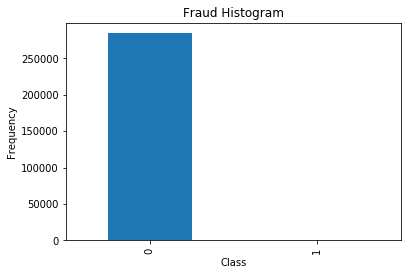

In [10]:
#Plotting Data
class_count = pd.value_counts(data['Class'], sort = 'True').sort_index()
class_count.plot(kind = 'bar')

plt.title("Fraud Histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [11]:
#Feature Scaling

scale = preprocessing.StandardScaler()
data['normalizedAmount'] = scale.fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Time', 'Amount'], axis = 1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [12]:
#Assigning X and Y

X = data.loc[:, data.columns != 'Class']
Y = data.loc[:, data.columns == 'Class']


In [13]:
#Number of and Indices of Data Points in Minority Class (Class == 1)
fraud_count = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

#Indices of Majority Class
normal_indices = data[data.Class == 0].index

#Picking Random Indices from Majority Class Indices (n = # of Fraud Points)
random_normal_indices = np.random.choice(normal_indices,fraud_count,replace = False)
random_normal_indices = np.array(random_normal_indices)

#Combining the two to create Undersampled Dataset
undersampled_indices = np.concatenate([fraud_indices, random_normal_indices])
undersampled_data = data.loc[undersampled_indices, :]

#Assigning X and Y for Undersampled Data Set
X_under = undersampled_data.loc[:, undersampled_data.columns != 'Class']
Y_under = undersampled_data.loc[:, undersampled_data.columns == 'Class']

Text(0,0.5,'Frequency')

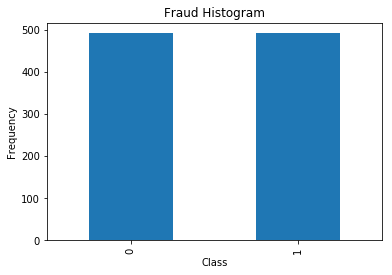

In [14]:
#Plotting New UnderSampled Data
class_count_undersample = pd.value_counts(undersampled_data['Class'], sort = 'True').sort_index()
class_count_undersample.plot(kind = 'bar')

plt.title("Fraud Histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [15]:
#Splitting Data into Train and Test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

X_train_under, X_test_under, Y_train_under, Y_test_under = train_test_split(X_under, Y_under, test_size = 0.3, random_state = 0)

print("")
print("Number transactions train dataset: ", len(X_train_under))
print("Number transactions test dataset: ", len(X_test_under))
print("Total number of transactions: ", len(X_train_under)+len(X_test_under))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


In [18]:
#Creating Multi-Layered Perceptron (UnderSampled Data)

mlp = MLPClassifier(hidden_layer_sizes = (28,28,28), activation = 'relu', learning_rate_init = 0.01, solver = 'adam')

#Fitting Data
mlp.fit(X_train_under, Y_train_under)

#Prediction
prediction = mlp.predict(X_test_under)

#Confusion Matrix and Classification Report
print(confusion_matrix(Y_test_under, prediction))
print(classification_report(Y_test_under, prediction))

[[143   6]
 [ 11 136]]
             precision    recall  f1-score   support

          0       0.93      0.96      0.94       149
          1       0.96      0.93      0.94       147

avg / total       0.94      0.94      0.94       296



/Users/anprahlad/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
#Creating Multi-Layered Perceptron (Skewed Data)

mlp2 = MLPClassifier(hidden_layer_sizes = (28,28,28), activation = 'relu', learning_rate_init = 0.01, solver = 'adam')

#Fitting Data
mlp2.fit(X_train, Y_train)

#Prediction
prediction2 = mlp2.predict(X_test)

#Confusion Matrix and Classification Report
print(confusion_matrix(Y_test, prediction2))
print(classification_report(Y_test, prediction2))

/Users/anprahlad/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[85270    26]
 [   30   117]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.82      0.80      0.81       147

avg / total       1.00      1.00      1.00     85443



In [24]:
#Creating Multi-Layered Perceptron (Whole Data)

mlp3 = MLPClassifier(hidden_layer_sizes = (28,28,28), activation = 'relu', learning_rate_init = 0.01, solver = 'adam')

#Fitting Data
mlp3.fit(X_train_under, Y_train_under)

#Prediction
prediction3= mlp.predict(X_test)

#Confusion Matrix and Classification Report
print(confusion_matrix(Y_test, prediction3))
print(classification_report(Y_test, prediction3))

/Users/anprahlad/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[80688  4608]
 [    6   141]]
             precision    recall  f1-score   support

          0       1.00      0.95      0.97     85296
          1       0.03      0.96      0.06       147

avg / total       1.00      0.95      0.97     85443

